## Libraries


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import pycats # tools for working with categorical variables in Pandas, required pandas
%matplotlib inline

## Importing Data

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-23/movie_profit.csv"
movies = pd.read_csv(url)
movies = movies.drop(['Unnamed: 0'], axis=1)
movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action
5,8/1/2014,Guardians of the Galaxy,170000000.0,333172112.0,7.710513e+08,Walt Disney,PG-13,Action
6,5/7/2010,Iron Man 2,170000000.0,312433331.0,6.211564e+08,Paramount Pictures,PG-13,Action
7,4/4/2014,Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,Walt Disney,PG-13,Action
8,7/11/2014,Dawn of the Planet of the Apes,170000000.0,208545589.0,7.106446e+08,20th Century Fox,PG-13,Adventure
9,11/10/2004,The Polar Express,170000000.0,186493587.0,3.106342e+08,Warner Bros.,G,Adventure


## General EDA

In [3]:
print(movies.shape)
print(movies.columns)
print(movies.genre.value_counts())

(3401, 8)
Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'distributor', 'mpaa_rating', 'genre'],
      dtype='object')
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: genre, dtype: int64


In [4]:
movies['difference'] = movies.loc[:,"worldwide_gross"] - movies.loc[:,"domestic_gross"]
movies['roi'] = round((movies.loc[:,"domestic_gross"] - movies.loc[:,"production_budget"])/ movies.loc[:,"production_budget"], 4) # domestic ROI
movies.distributor.value_counts()
good_roi = movies.loc[movies['roi'] >= 1] # 3401 - 1752 = 1649 films have < 100% ROI
poor_roi = movies.loc[movies['roi'] < 1]

# Creating lists for good/poor rois by genre
poor_genre_label = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror']
good_genre_label = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror']
poor_genre = list(poor_roi.genre.value_counts().divide(movies.genre.value_counts()))
good_genre = list(good_roi.genre.value_counts().divide(movies.genre.value_counts()))

# Creating tables to inspect success of genres by ROI
good_table = pd.concat([pd.Series(good_genre_label), pd.Series(good_genre)], axis='columns')
good_table.columns = ['genre', 'good_genre']
poor_table = pd.concat([pd.Series(poor_genre_label), pd.Series(poor_genre)], axis='columns')
poor_table.columns = ['genre', 'poor_genre']
genre_table = pd.merge(poor_table, good_table, on='genre', how='inner')
genre_table['difference'] = abs(genre_table['poor_genre'] - genre_table['good_genre'])
print(genre_table)





       genre  poor_genre  good_genre  difference
0      Drama    0.745146    0.254854    0.490291
1     Comedy    0.674047    0.325953    0.348093
2     Action    0.827225    0.172775    0.654450
3  Adventure    0.723493    0.276507    0.446985
4     Horror    0.560403    0.439597    0.120805


### Action:
- About 54% of all action films in our dataset had a poor ROI of < 1.

### Adventure:
- About 56% of all adventure films in our dataset had a good ROI of > 1.

### Comedy:
- About 57% of all comedy films in our dataset had a good ROI of > 1.

### Drama:
- About 55% of all drama films in our movies dataset had a poor return on investment (ROI) of < 1.

### Horror:
- Less than a third of all horror films in our dataset had a poor ROI of < 1.
- Conversely, over two-thirds of all horror films had a good ROI of > 1.


### Takeaway

Based solely on genre of films, if someone wanted to produce a movie with a good ROI, then the genre of the movie should be either Comedy, Adventure, or Horror. Horror appears to be the best genre for ROI since they are twice as likely to have a good ROI than a bad ROI. Drama and Action are the only genres with less than half of their movies (about 45%) earning an ROI of at least 100%.

Still, this very simple table doesn't answer the most important question: _why_ do movies genres like Comedy, Adventure and Horror give such a good ROI while other genres like Drama and Action don't perform as well?

          multiple    action  adventure    comedy     drama    horror
multiple                                                             
1.0              1  0.454545   0.488722  0.366038  0.387302  0.305344
2.0              2  0.202020   0.157895  0.200000  0.177778  0.152672
3.0              3  0.090909   0.150376  0.113208  0.104762  0.061069
4.0              4  0.040404   0.060150  0.064151  0.076190  0.068702
5.0              5  0.030303   0.037594  0.083019  0.047619  0.045802
6.0              6  0.050505   0.015038  0.033962  0.034921  0.030534
7.0              7  0.020202   0.030075  0.041509  0.022222  0.030534
8.0              8  0.010101   0.007519  0.011321  0.015873  0.015267
9.0              9  0.010101   0.007519  0.003774  0.025397  0.022901
10.0            10  0.090909   0.045113  0.083019  0.107937  0.267176


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


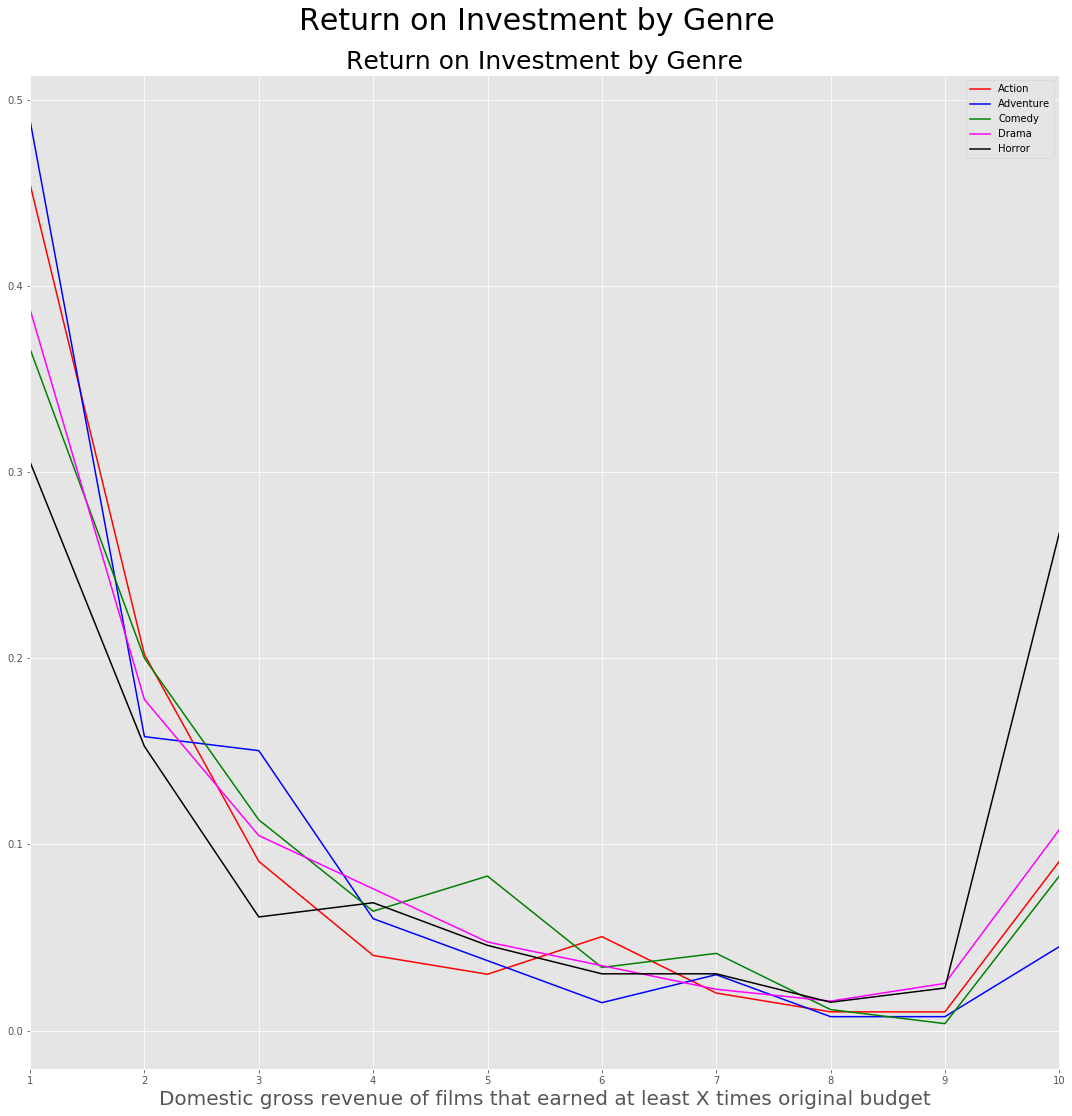

In [5]:
# inspecting movies with good ROI

# creating bins based on 'poor' or 'good' roi 
roi_bins = [-999,1, 9999]
roi_bins_labels = ['poor', 'good']
movies['roi_group'] = pd.cut(movies['roi'], bins=roi_bins, labels=roi_bins_labels)
movies

# Inspecting horror movie genre
good_roi_movies = movies.loc[movies['roi'] > 0.99]
good_roi_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 999]
good_roi_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
good_roi_movies['multiple'] = pd.cut(good_roi_movies['roi'], bins=good_roi_bins, labels=good_roi_labels) 

# print(good_roi_movies['multiple'].value_counts(normalize=True))

good_melt = pd.melt(good_roi_movies, id_vars='genre', value_vars='multiple', value_name='multiple')
good_df = good_melt.groupby(['genre', 'multiple']).count()

action = pd.Series(good_df.loc[('Action'), 'variable'] / sum(good_df.loc[('Action'), 'variable']))
adventure = pd.Series(good_df.loc[('Adventure'), 'variable'] / sum(good_df.loc[('Adventure'), 'variable']))
comedy = pd.Series(good_df.loc[('Comedy'), 'variable'] / sum(good_df.loc[('Comedy'), 'variable']))
drama = pd.Series(good_df.loc[('Drama'), 'variable'] / sum(good_df.loc[('Drama'), 'variable']))
horror = pd.Series(good_df.loc[('Horror'), 'variable'] / sum(good_df.loc[('Horror'), 'variable']))
movies_dict = {'multiple':good_roi_labels, 'action':action, 'adventure':adventure, 'comedy':comedy, 'drama':drama, 'horror':horror}
roi_df = pd.DataFrame(movies_dict)
print(roi_df)


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 15]
plt.plot(roi_df['multiple'], roi_df['action'], color='red', label='Action')
plt.title('Action')
plt.plot(roi_df['adventure'], color='blue', label='Adventure')
plt.title('Adventure')
plt.plot(roi_df['comedy'], color='green', label='Comedy')
plt.title('Comedy')
plt.plot(roi_df['drama'], color='magenta', label='Drama')
plt.title('Drama')
plt.plot(roi_df['horror'], color='black', label='Horror')
plt.suptitle('Return on Investment by Genre', y=1.03, fontsize=30)
plt.title('Return on Investment by Genre', fontsize=25)
plt.xlabel('Domestic gross revenue of films that earned at least X times original budget', fontsize=20)
plt.xlim([1, 10])
plt.legend(loc='top right')
plt.tight_layout()
plt.show()

          multiple    action  adventure    comedy     drama    horror
multiple                                                             
1.0              1  0.454545   0.488722  0.366038  0.387302  0.305344
2.0              2  0.202020   0.157895  0.200000  0.177778  0.152672
3.0              3  0.090909   0.150376  0.113208  0.104762  0.061069
4.0              4  0.040404   0.060150  0.064151  0.076190  0.068702
5.0              5  0.030303   0.037594  0.083019  0.047619  0.045802
6.0              6  0.050505   0.015038  0.033962  0.034921  0.030534
7.0              7  0.020202   0.030075  0.041509  0.022222  0.030534
8.0              8  0.010101   0.007519  0.011321  0.015873  0.015267
9.0              9  0.010101   0.007519  0.003774  0.025397  0.022901
10.0            10  0.090909   0.045113  0.083019  0.107937  0.267176


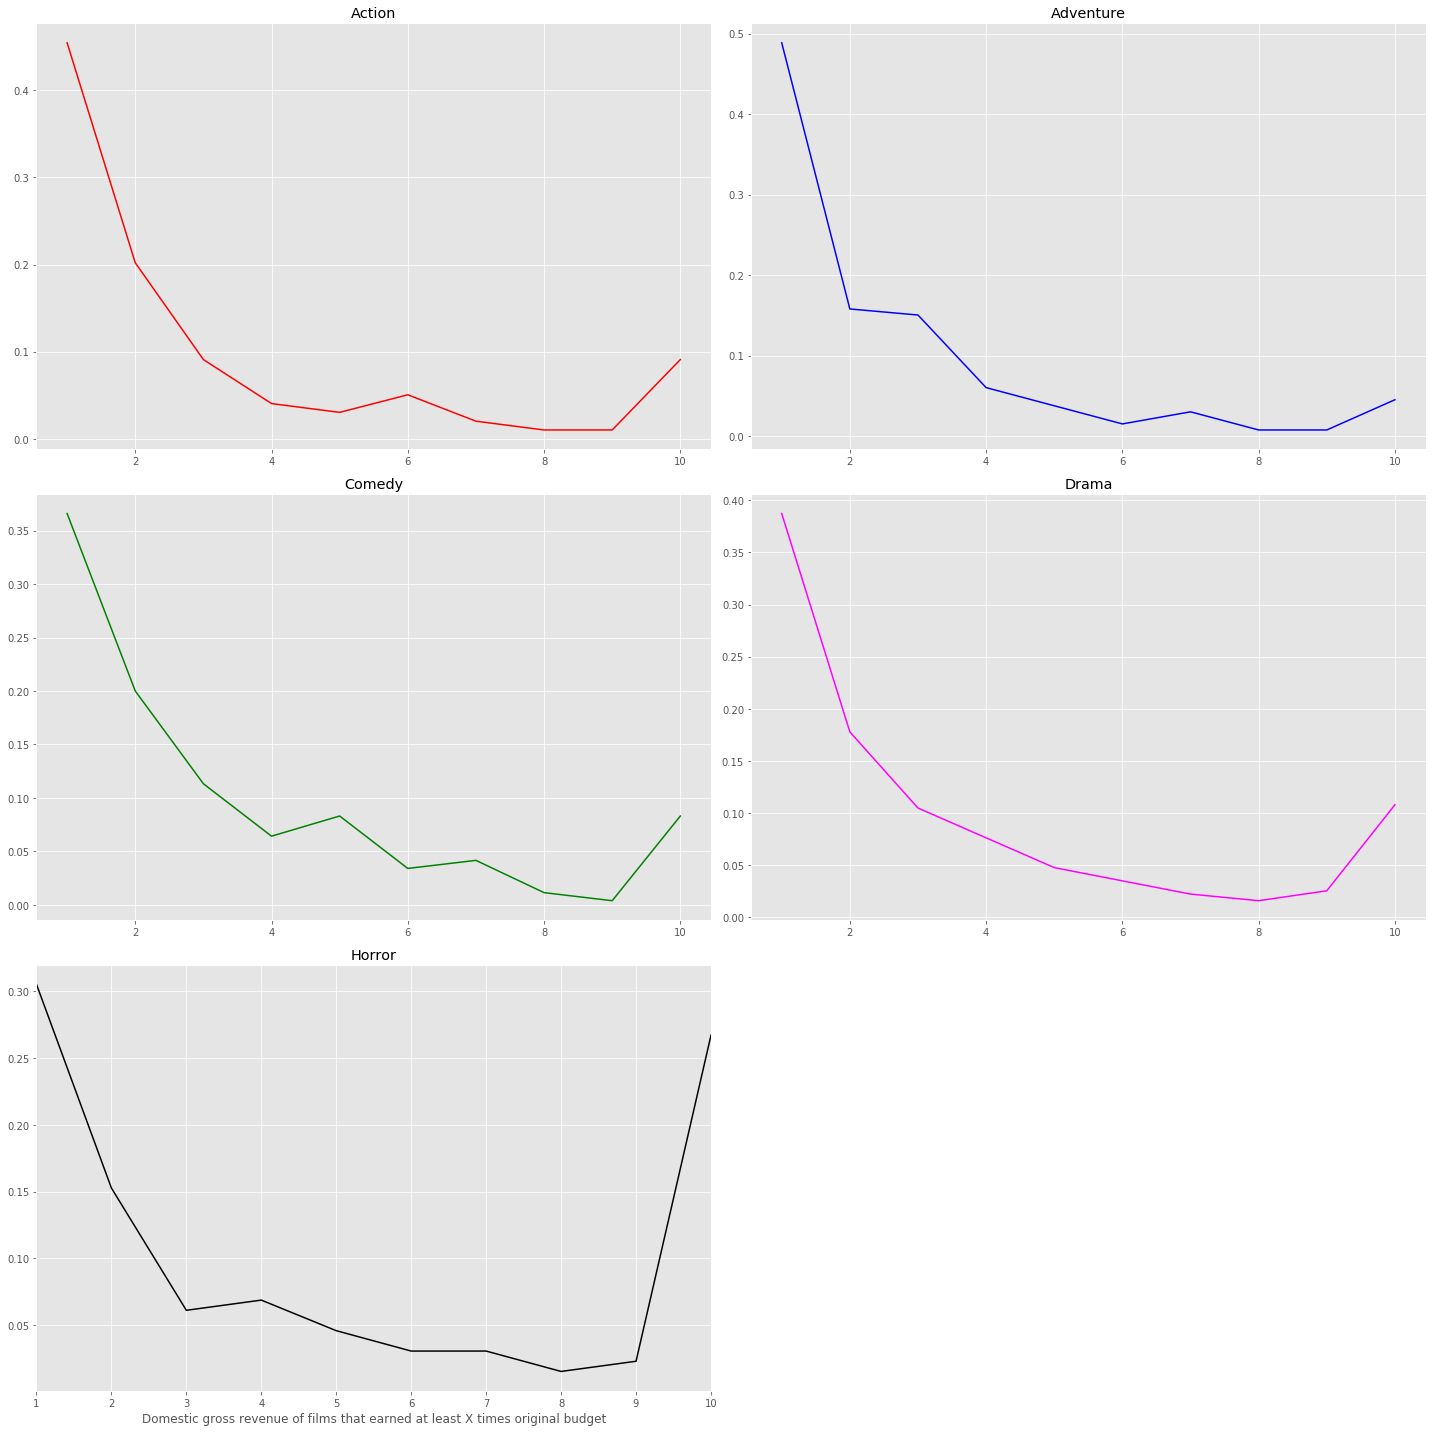

In [6]:
action = pd.Series(good_df.loc[('Action'), 'variable'] / sum(good_df.loc[('Action'), 'variable']))
adventure = pd.Series(good_df.loc[('Adventure'), 'variable'] / sum(good_df.loc[('Adventure'), 'variable']))
comedy = pd.Series(good_df.loc[('Comedy'), 'variable'] / sum(good_df.loc[('Comedy'), 'variable']))
drama = pd.Series(good_df.loc[('Drama'), 'variable'] / sum(good_df.loc[('Drama'), 'variable']))
horror = pd.Series(good_df.loc[('Horror'), 'variable'] / sum(good_df.loc[('Horror'), 'variable']))
movies_dict = {'multiple':good_roi_labels, 'action':action, 'adventure':adventure, 'comedy':comedy, 'drama':drama, 'horror':horror}
roi_df = pd.DataFrame(movies_dict)
print(roi_df)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 20]
plt.subplot(3,2,1)
plt.plot(roi_df['multiple'], roi_df['action'], color='red', label='Action')
plt.title('Action')
plt.subplot(3,2,2)
plt.plot(roi_df['adventure'], color='blue', label='Adventure')
plt.title('Adventure')
plt.subplot(3,2,3)
plt.plot(roi_df['comedy'], color='green', label='Comedy')
plt.title('Comedy')
plt.subplot(3,2,4)
plt.plot(roi_df['drama'], color='magenta', label='Drama')
plt.title('Drama')
plt.subplot(3,2,5)
plt.plot(roi_df['horror'], color='black', label='Horror')
plt.title('Horror')
plt.xlabel('Domestic gross revenue of films that earned at least X times original budget')
plt.xlim([1, 10])
plt.tight_layout()
plt.show()



Nearly all the films follow the same, nearly parabolic pattern.

The most interesting plot here belongs to the Horror genre, which experiences an ROI multiple of 1 about 30% of the time when Horror films yield an ROI of 100% or more. Additionally, the Horror genre also experiences an ROI multiple of 10 about 27% of the time (nearly the same as its ROI multiple of 1!). That's __5.92 times more than the Adventure genre__ and __2.48 times more than the Drama genre__.  


Looking at the plots, regardless of genre, it makes sense that it gets harder and harder for films to earn higher ROI multiples (it's hard to make a lot of money in general). My intuition tells me that I need to take a look at the budget of each film. Is it easier for films to experience a good ROI the higher or lower its production budget? 

Investigating low, mid, and high budget films
Does investing more money into a film make it more likely to yield greater ROI?
Which genres struggle to generate success at the Box Office? Domestically? Internationally?

There are 314 unique production budgets and 3401 different movies.


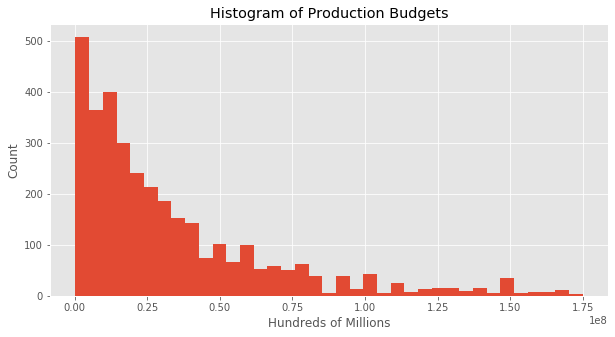

count    3.401000e+03
mean     3.328474e+07
std      3.489239e+07
min      2.500000e+05
25%      9.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.750000e+08
Name: production_budget, dtype: float64
poor    2458
good     943
Name: d_roi_group, dtype: int64
poor    1724
good    1677
Name: ww_roi_group, dtype: int64


In [7]:
# Creating variables to find ROI for domestic and worldwide gross
movies['international_gross'] = movies['worldwide_gross'] - movies['domestic_gross']
movies['ww_roi'] = (movies['worldwide_gross'] - movies['production_budget']) / movies['production_budget']
movies['d_roi'] = (movies['domestic_gross'] - movies['production_budget']) / movies['production_budget']


# Classifying domestic and worldwide ROI as either poor or good
roi_bins = [-999,1, 9999]
roi_bins_labels = ['poor', 'good']
movies['ww_roi_group'] = pd.cut(movies['ww_roi'], bins=roi_bins, labels=roi_bins_labels)
movies['d_roi_group'] = pd.cut(movies['d_roi'], bins=roi_bins, labels=roi_bins_labels)


print('There are', movies['production_budget'].nunique(), 'unique production budgets and', movies.shape[0], 'different movies.')


# Histogram of Production Budget
plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(movies['production_budget'], bins='auto')
plt.title('Histogram of Production Budgets')
plt.xlabel('Hundreds of Millions')
plt.ylabel('Count')
plt.show()


# Summary of Production Budget
print(movies['production_budget'].describe())
print(movies['d_roi_group'].value_counts())
print(movies['ww_roi_group'].value_counts())


# Source: https://americanfilmmarket.com/types-3m-10m-films-break/

In [8]:
# Importing US Consumer Pricing Index: cpi.csv 
cpi = pd.read_excel('cpi.xls', header=0)
cpi.columns = ['Year', "Annual Average", "Annual Percentage Change"]
cpi = cpi.drop(0)
print(cpi)

# Creating varaible release_year to merge cpi data
movies['release_year'] = movies['release_date'].str[-4:]
movies['release_year'] = movies['release_year'].astype(int) 
cpi['Year'] = cpi['Year'].astype(int)
adjusted = pd.merge(movies, cpi, left_on='release_year', right_on='Year', how='outer') # need same dtype of joined columns
adjusted = adjusted[:3401]



      Year  Annual Average Annual Percentage Change
1     1913             9.9                      NaN
2     1914            10.0                    0.013
3     1915            10.1                    0.009
4     1916            10.9                    0.077
5     1917            12.8                    0.178
6     1918            15.0                    0.173
7     1919            17.3                    0.152
8     1920            20.0                    0.156
9     1921            17.9                   -0.109
10    1922            16.8                   -0.062
11    1923            17.1                    0.018
12    1924            17.1                    0.004
13    1925            17.5                    0.024
14    1926            17.7                    0.009
15    1927            17.4                   -0.019
16    1928            17.2                   -0.012
17    1929            17.2                        0
18    1930            16.7                   -0.027
19    1931  

I will now attempt to classify production budgets as low, middle, or high. After doing some research, I learned that definitions of "low, mid and high budget films" varies depending on which markets one is considering. For example, users from [this Quora post](https://www.quora.com/What-are-the-figures-in-dollars-that-Hollywood-classes-as-low-mid-and-high-budget-films) argue that there are _"no official numbers"_. High budget indie films from Writer's Guild of America is anything over 5 million, while a director like Steven Spielberg considers high budget films to be over 100 million. Some films made by a US/Major Studio market will have different production budgets than those marketing to the independent/international market. Classifying production budgets as low, mid, or high is relative to the market one is considering, which studio is producing the film, which the film is made in and how strong the economy is.

First, I will adjust for inflation, and then classify films' real_budget as low, mid, or high. 
For this project, I will leave worldwide gross untouched since I require more information that I don't currently possess. The reason why is because worldwide_gross contains gross from all over the world across different countries and economies. This greatly complicates my ambitions to adjust for inflation. 



### According to Film Industry Analyst, Stephen Follows, and Founder of The Numbers, Bruce Nash, they classify indie production budgets in the following:

- Low-budget: x < 3,000,000
- Mid-budget: 10,000,000 < x < 20,000,000
- High-budget:  20,000,000 < x < 50,000,000


For now, I will classify budgets from the perspective of a "major studio". According to Shane Snoke, a Media and Technology Executive from Scypher Media, budgets are classified in the following:
- Low Budget: x < 30,000,000
- Mid Budget: 30,000,000 < x < 85,000,000
- High Budget: x > 85,000,000

In [9]:
# Adjusting production_budget for inflation
cpi2019 = cpi.loc[cpi['Year'] == 2019]['Annual Average']

inflation_rate = np.divide(np.repeat(cpi2019, len(adjusted['Annual Average'])), adjusted['Annual Average'])
adjusted['real_budget'] = np.multiply(adjusted['production_budget'], inflation_rate)
adjusted['real_budget'].sort_values(ascending=False)


# Adjusting domestic_gross for inflation
adjusted['real_d_gross'] = np.multiply(adjusted['domestic_gross'], inflation_rate)

# Getting rid of films that didn't make any domestic and worldwide gross
# Some of these films went straight to DVD, haven't premiered yet, or didn't make money for unknown reasons
adjusted = adjusted.loc[(adjusted['domestic_gross'] != 0) & (adjusted['worldwide_gross'] != 0)]

# Reformatting columns and changing scientific notation to decimal form
pd.set_option('display.float_format', lambda x : '%.3f' % x)
adjusted.sort_values('real_budget')
adjusted['release_year'] = adjusted['release_year'].astype('int')
adjusted['Year'] = adjusted['Year'].astype('int')



In [10]:
# Classifying domestic and worldwide ROI as either poor or good
budget_bins = [0, 30000000, 85000000, 9999999999]
budget_labels = ['low', 'mid', 'high']
adjusted['budget_type'] = pd.cut(adjusted['real_budget'], bins=budget_bins, labels=budget_labels)





## Inspecting low, mid and high budget films by Genre



In [42]:
print(adjusted['budget_type'].value_counts())

low_budget = adjusted.loc[adjusted['budget_type'] == 'low', ['genre', 'd_roi', 'd_roi_group', 'real_budget', 'real_d_gross']]
mid_budget = adjusted.loc[adjusted['budget_type'] == 'mid', ['genre', 'd_roi', 'd_roi_group', 'real_budget', 'real_d_gross']]
high_budget = adjusted.loc[adjusted['budget_type'] == 'high', ['genre', 'd_roi', 'd_roi_group', 'real_budget', 'real_d_gross']]

print(low_budget['d_roi_group'].value_counts(normalize=True))
print(mid_budget['d_roi_group'].value_counts(normalize=True))
print(high_budget['d_roi_group'].value_counts(normalize=True))


low_budget['d_roi_group'] = low_budget['d_roi_group'].astype('category')
low_budget['d_roi_group'] = low_budget['d_roi_group'].cat.set_categories(['poor', 'good'])
mid_budget['d_roi_group'] = mid_budget['d_roi_group'].astype('category')
mid_budget['d_roi_group'] = mid_budget['d_roi_group'].cat.set_categories(['poor', 'good'])
high_budget['d_roi_group'] = high_budget['d_roi_group'].astype('category')
high_budget['d_roi_group'] = high_budget['d_roi_group'].cat.set_categories(['poor', 'good'])

# Creating a table that shows relative frequencies of low-budget films by genre
# add columns totaling real_budget and real_d_gross, and new variable 'total_roi'
low_melt = pd.melt(low_budget, id_vars='genre', value_vars=['d_roi_group'], value_name='class', var_name='rel_freq')
low_df = low_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count').divide(low_melt.groupby(['genre']).count()).drop('class', axis=1)
low_df['count'] = low_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count')
print(low_df)

mid_melt = pd.melt(mid_budget, id_vars='genre', value_vars='d_roi_group', value_name='class', var_name='rel_freq')
mid_df = mid_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count').divide(mid_melt.groupby(['genre']).count()).drop('class', axis=1)
mid_df['count'] = mid_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count')
print(mid_df)

high_melt = pd.melt(high_budget, id_vars='genre', value_vars='d_roi_group', value_name='class', var_name='rel_freq')
high_df = high_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count').divide(high_melt.groupby(['genre']).count()).drop('class', axis=1)
high_df['count'] = high_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count')
print(high_df)


low     1647
mid     1104
high     584
Name: budget_type, dtype: int64
poor   0.633
good   0.367
Name: d_roi_group, dtype: float64
poor   0.759
good   0.241
Name: d_roi_group, dtype: float64
poor   0.875
good   0.125
Name: d_roi_group, dtype: float64
                 rel_freq  count
genre     class                 
Action    good      0.385     42
          poor      0.615     67
Adventure good      0.463     38
          poor      0.537     44
Comedy    good      0.374    174
          poor      0.626    291
Drama     good      0.299    232
          poor      0.701    543
Horror    good      0.546    118
          poor      0.454     98
                 rel_freq  count
genre     class                 
Action    good      0.159     36
          poor      0.841    190
Adventure good      0.302     57
          poor      0.698    132
Comedy    good      0.307     86
          poor      0.693    194
Drama     good      0.213     74
          poor      0.787    274
Horror    good      0.2

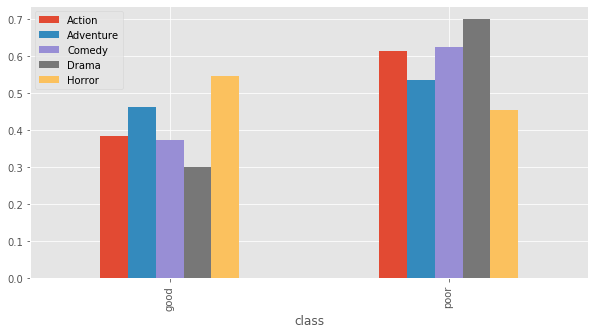

In [201]:
# Barplot of Good ROI vs. Bad ROI by Genre
ax = low_df.drop('count', axis=1).unstack(level=0).plot(kind='bar')
ax.legend(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror'], loc='upper left')
plt.show()

Low-budget films:
- Horror is the only genre that has more than half of its films (54.6%) returning a good ROI.
- Altough Drama has the most films that return a good ROI, it is the worst genre to invest a low-budget film since only 29.9% of Drama films have a good ROI.

Mid-budget films:
- All genres struggle to return a good ROI when they have a mid-sized production budget.
- The genres that struggle the most are Action and Horror, with only 15.9% and 21.3% of films returning a good ROI.
- Given a mid-sized budget, the genres that give the best returns are Adventure and Comedy, with a rate of 30.2% and 30.7%, respectively. These rates are marginally better than the worst genre, Drama, for low-budget films.  

High-budget films:
- All genres struggle to return a good ROI given a high production budget.
- Only 9.4% of Action films have a good ROI, meaning over 90% of them either lose money or make money, but less than 100% ROI.
- Horror movies are known  as the best investment in Hollywood, but when it comes to a Horror movie with a high production budget, not a single Horror movie returned a good ROI in our dataset.
- Given a high production budget, Adventure films perform the best with a 19% rate of good ROI.

Regardless of genre, there's an obvious trend as production budgets increase - movies are less likely to have a good ROI. But even if less and less movies return good ROI, are major studios still making money after so many films reutrn a poor ROI?


In [151]:
low_bd = low_budget.drop('d_roi', axis=1).groupby(['genre', 'd_roi_group']).sum()
low_concat = pd.concat([low_df, low_bd], axis='columns')
low_concat.index.names = ['genre', 'class']
low_concat['difference'] = low_concat['real_d_gross'] - low_concat['real_budget']
low_concat['roi'] = low_concat['difference'].divide(low_concat['real_budget'])
print(low_concat)

mid_bd = mid_budget.drop('d_roi', axis=1).groupby(['genre', 'd_roi_group']).sum()
mid_concat = pd.concat([mid_df, mid_bd], axis='columns')
mid_concat.index.names = ['genre', 'class']
mid_concat['difference'] = mid_concat['real_d_gross'] - mid_concat['real_budget']
mid_concat['roi'] = mid_concat['difference'].divide(mid_concat['real_budget'])
print(mid_concat)

high_bd = high_budget.drop('d_roi', axis=1).groupby(['genre', 'd_roi_group']).sum()
high_concat = pd.concat([high_df, high_bd], axis='columns')
high_concat.index.names = ['genre', 'class']
high_concat = high_concat.drop([('Horror', 'good')], axis=0) # dropping the row with NaNs
high_concat['difference'] = high_concat['real_d_gross'] - high_concat['real_budget']
high_concat['roi'] = high_concat['difference'].divide(high_concat['real_budget'])
print(high_concat)



                 rel_freq  count    real_budget    real_d_gross  \
genre     class                                                   
Action    good      0.385     42  628542528.500  3116306528.520   
          poor      0.615     67 1166713180.236   788274944.993   
Adventure good      0.463     38  726258452.075  2778549462.536   
          poor      0.537     44  788665040.789   596398400.844   
Comedy    good      0.374    174 2477870391.651 14338867944.597   
          poor      0.626    291 4073943138.349  3339085887.691   
Drama     good      0.299    232 2658081959.934 17507162098.584   
          poor      0.701    543 6980063682.443  4019249918.998   
Horror    good      0.546    118 1310237420.795  7544953863.583   
          poor      0.454     98 1348937210.725  1267220107.524   

                     difference    roi  
genre     class                         
Action    good   2487764000.019  3.958  
          poor   -378438235.243 -0.324  
Adventure good   2052291010.461

## Low-budget films:

### 1) Action films

Low-budget action films that had a good ROI made nearly 2.5 billion dollars, overall, but action films with a poor ROI lost nearly $380 million dollars. Even though action films only had a good ROI rate of 38.5%, the success of those films more than made up for the poor ROIs of 67 action movies. Good ROI action movies had nearly *half* the budget of poor ROI and their collective ROI (cROI) was 395.8% while poor ROI action movies had a cROI of -32.4%.

### 2) Adventure films

Low-budget adventure films by good/poor ROI had nearly the same budget, but good ROI films had a cROI of 282.6% while poor ROI films had a cROI of -24.4%. 

### 3) Comedy Films

Low-budget comedy films make the second most amount of money overall and boasts a cROI of 478.7%. 


### 4) Drama Films

Low-budget drama films make the most amount of money overall (14.8 billion dollars), but it also loses the most amount of money from movies with poor ROI (2.9 billion dollars lost). It boasts the highest cROI of 558.6%.


### 5) Horror Films
The most interesting observation from the Horror genre is that it loses the *least* amount of money due to poor ROI. It loses only 81 million dollars. The next lowest losing genre, Adventure, lost 2.35 times that and the highest losing genre, Drama, lost 36.2 times what the Horror genre lost.

### Low-budget Takeaway
For low-budget films, Horror movies appear to be the safest investment since an investor would lose less money than any other genre. 


## Mid-budget films:

### 1) Action films

Only 15.9% of mid-budget Action films have a good ROI. Good ROI action films have nearly 20% of the budget poor ROI action films have, yet they have similar domestic gross (8.023 to 8.821 billion, respectively). Action films loses the second most amount of money due to poor ROI at 1.575 billion dollars (poor cROI of -15.2%).


### 2) Adventure films

Poor ROI adventure films have 2.27 times more budget than good ROI films. It is also the highest earning genre when it comes to mid-budget films at 13.361 billion dollars.


### 3) Comedy films

Mid-budget comedy films with poor ROIs make back nearly 96% of every dollar spent in making a movie. It has the smallest poor cROI of -4.1%. After accounting for the difference in money made from good ROI films and money lost from poor ROI films, it is the second highest earning genre for mid-budget films at 11.355 billion dollars. 


### 4) Drama films

Drama earns the second highest domestic gross after accounting for production budget, but due to its high poor cROI of -19.7%, after also taking into account money lost from poor ROI films (-2.725 billion), it is the third highest earning genre for mid-budget films at 9.481 billion dollars.


### 5) Horror films

Horror is the lowest earning genre for mid-budget films, but it almost loses the second least amount of money (poor cROI of -5.5%). It is the genre with the least amount of money invested, but boasts the highest good cROI of 566.5%.


### Mid-budget Takeaway

In low-budget films, Horror films were the safest investment since you would lose the least amount of money. Comedy was a distant second with triple the poor cROI of Horror (-6.1% vs. -18.0%). However, when we look look at mid-budget films, Comedy films become viable and are a safer investment than Horror films (poor cROI of -4.1% vs. -5.5%, respectively) - the investor loses slightly less money than Horror films by investing in Comedy films. Although the total number of comedy and horror films differ (280 vs 61, respectively), comedy films are more likely than horror films have a good ROI (30.7% to 21.3%).

## High-budget films:

### 1) Action films

High-budget action films are one of only two viable genres for high-budget films.


### 2) Adventure films
High-budget adventure films earn the most after accounting for production budgets with 9.208 billion dollars. It also has the smallest poor cROI of -4.1%. Adventure films still make the most amount of money after taking the difference between money made from good ROI films and money lost from poor ROI films with 8.329 billion dollars. 


### 3) Comedy films

High-budget comedy films only make 26 million dollars when taking the difference between money made from good ROI films (after subtracting production budget) and money lost from poor ROI films. Only 8.6% of high-budget comedy films have a good ROI - the worst among all genres. 


### 4) Drama films

Drama films perform very poorly when taking into account money made after subtracting production budget and money lost from movies with poor ROI. After taking those things into consideration, high-budget drama films made a paltry 221 million dollars in our dataset.

### 5) Horror films

High-budget horror films are the worst performing genre in our dataset since there does not exist a single high-budget horror movie that had a good ROI. Granted, there are only 13 high-budget horror movies in our dataset, so we cannot infer any further. But moving forward, investors should be cautious when investing in high-budget movies and investigate their poor returns.

### High-budget Takeaway

It's hard to justify making high-budget films. Comedy, Drama and Horror all perform horribly or barely break even. High-budget action and adventure films are the only genres making money given a high budget. But why should someone choose to invest in a high-budget action/adventure movie when they could make more money making a mid-budget adventure film or mid-budget action film?

Without taking into account genre, low-budget films have a good ROI 50% of the time more than mid-budget films and 300% times more than high_budget films.

In [13]:
# Cleaning movie distributors
print(adjusted['distributor'].value_counts())
adjusted['distributor'] = adjusted['distributor'].str.strip() # strips whitespace left and right of string
print(adjusted['distributor'].unique())


# Function to remove unicode from distributor variable
def dist_strip(df, col_name='distributor'):
    """ Returns a dictionary of each unique movie distributor with /xa0 stripped. """
    
    # Initialize an empty dictionary: val
    val = {}
    
    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in dataframe
    for i in col:
        # Normalizing unicode form. There are different formats, so try each one until you find the right one
        val[i] = unicodedata.normalize("NFKD", str(i))
    # Returns the val dictionary
    return val

# Storing dist_strip's result in new object
dist_dict = dist_strip(adjusted)

# Mapping adjusted['distributor'] to normalized form
adjusted['distributor'] = adjusted['distributor'].map(dist_dict)
print(adjusted['distributor'].unique())



        

Warner Bros.              373
Sony Pictures             339
Universal                 307
20th Century Fox          281
Paramount Pictures        264
Walt Disney               240
Lionsgate                 142
MGM                       120
Miramax                   102
New Line                  100
Sony Pictures Classics     97
Fox Searchlight            81
Weinstein Co.              67
Focus Features             54
Dreamworks SKG             44
Magnolia Pictures          33
Roadside Attractions       29
Open Road                  23
Freestyle Releasing        21
Paramount Vantage          21
IFC Films                  20
Relativity                 20
Artisan                    19
United Artists             18
Summit Entertainment       18
Orion Pictures             16
A24                        16
Samuel Goldwyn Films       15
Miramax/Dimension          15
Anchor Bay Entertai…       14
                         ... 
Cohen Media Group           1
Compass International       1
Kino Lorbe

In [14]:
# Cleaning empty distributor values
adjusted.loc[adjusted['movie'] == 'Love Ranch', 'distributor'] = 'Capitol Films'
adjusted.loc[adjusted['movie'] == 'Joheunnom nabbeunnom isanghannom', 'distributor'] = 'CJ Entertainment'
adjusted.loc[adjusted['movie'] == 'After.Life', 'distributor'] = 'Anchor Bay Entertainment'
adjusted.loc[adjusted['movie'] == 'Tau ming chong', 'distributor'] = 'Media Asia Distribution'
adjusted.loc[adjusted['movie'] == 'Defendor', 'distributor'] = 'Alliance Films'
adjusted.loc[adjusted['movie'] == 'Fireflies in the Garden', 'distributor'] = 'Universal'
adjusted.loc[adjusted['movie'] == 'Company Man', 'distributor'] = 'Weinstein Co.'
adjusted.loc[adjusted['movie'] == 'Akira', 'distributor'] = 'Toho'
adjusted.loc[adjusted['movie'] == 'Lisa Picard is Famous', 'distributor'] = 'First Look International' # screened at a film festival
adjusted.loc[adjusted['movie'] == 'Jackpot', 'distributor'] = 'Sony Pictures Classics'
adjusted.loc[adjusted['movie'] == 'Taxman', 'distributor'] = 'Phaedra Cinema'
adjusted.loc[adjusted['movie'] == 'The Gambler', 'distributor'] = 'Channel Four Films'
adjusted.loc[adjusted['movie'] == 'Broken Vessels', 'distributor'] = 'Unapix Entertainment Productions'
adjusted.loc[adjusted['movie'] == 'Harvard Man', 'distributor'] = 'Lionsgate'
adjusted.loc[adjusted['movie'] == 'Sonny', 'distributor'] = 'Samuel Goldwyn Films'
adjusted.loc[adjusted['movie'] == 'Love Liza', 'distributor'] = 'Sony Pictures Classics'
adjusted.loc[adjusted['movie'] == 'Luminarias', 'distributor'] = 'New Latin Pictures'
adjusted.loc[adjusted['movie'] == 'Mercy Streets', 'distributor'] = 'Con Dios Entertainment'
adjusted.loc[adjusted['movie'] == 'Critical Care', 'distributor'] = 'LIVE Entertainment'
adjusted.loc[adjusted['movie'] == 'Sunday', 'distributor'] = 'A-Mark Entertainment'
adjusted.loc[adjusted['movie'] == 'Return to the Blue Lagoon', 'distributor'] = 'Columbia'
adjusted.loc[adjusted['movie'] == 'Showdown in Little Tokyo', 'distributor'] = 'Warner Bros.'
adjusted.loc[adjusted['movie'] == 'Return of the Living Dead 3', 'distributor'] = 'Trimark'
adjusted.loc[adjusted['movie'] == 'Ruby in Paradise', 'distributor'] = 'October Films'
adjusted.loc[adjusted['movie'] == 'Metropolitan', 'distributor'] = 'New Line Cinema'
adjusted.loc[adjusted['movie'] == 'UHF', 'distributor'] = 'Orion Classics'
adjusted.loc[adjusted['movie'] == 'Roar', 'distributor'] = 'Filmways Pictures'
adjusted.loc[adjusted['movie'] == "It's a Mad Mad Mad Mad World", 'distributor'] = 'United Artists'
adjusted.loc[adjusted['movie'] == 'Maurice', 'distributor'] = 'Cinecom Pictures'
adjusted.loc[adjusted['movie'] == 'American Ninja 2: The Confrontation', 'distributor'] = 'Cannon Releasing Corporation'
adjusted.loc[adjusted['movie'] == "Losin' It", 'distributor'] = 'Embassy Pictures Corporation'
adjusted.loc[adjusted['movie'] == "E tu vivrai nel terrore - L'aldilà", 'distributor'] = 'Medusa Distribuzione'
adjusted.loc[adjusted['movie'] == 'Darling Lili', 'distributor'] = 'Paramount Pictures'
adjusted.loc[adjusted['movie'] == 'The Molly Maguires', 'distributor'] = 'Paramount Pictures'
adjusted.loc[adjusted['movie'] == 'The Great Gatsby', 'distributor'] = 'Paramount Pictures'
adjusted.loc[adjusted['movie'] == 'Benji', 'distributor'] = 'Mulberry Square Releasing'
adjusted.loc[adjusted['movie'] == 'Monty Python and the Holy Grail', 'distributor'] = 'Cinema 5'
adjusted.loc[adjusted['movie'] == 'In Cold Blood', 'distributor'] = 'Columbia'
adjusted.loc[adjusted['movie'] == "It’s a Wonderful Life", 'distributor'] = 'RKO Radio Pictures'
adjusted.loc[adjusted['movie'] == 'The French Connection', 'distributor'] = '20th Century Fox'



In [15]:
print(adjusted['distributor'].value_counts())
print(adjusted['distributor'].unique())
adjusted.loc[adjusted['distributor'] == 'New Line']

Warner Bros.              374
Sony Pictures             339
Universal                 308
20th Century Fox          282
Paramount Pictures        267
Walt Disney               240
Lionsgate                 143
MGM                       120
Miramax                   102
New Line                  100
Sony Pictures Classics     99
Fox Searchlight            81
Weinstein Co.              68
Focus Features             54
Dreamworks SKG             44
Magnolia Pictures          33
Roadside Attractions       29
Open Road                  23
Freestyle Releasing        21
Paramount Vantage          21
IFC Films                  20
Relativity                 20
Artisan                    19
United Artists             19
Summit Entertainment       18
Samuel Goldwyn Films       16
A24                        16
Orion Pictures             16
Miramax/Dimension          15
Anchor Bay Entertai...     14
                         ... 
Associated Film Dis...      1
WinStar Cinema              1
IDP Distri

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,difference,roi,...,d_roi,ww_roi_group,d_roi_group,release_year,Year,Annual Average,Annual Percentage Change,real_budget,real_d_gross,budget_type
29,11/16/2007,Love in the Time of Cholera,45000000.000,4617608.000,31077418.000,New Line,R,Drama,26459810.000,-0.897,...,-0.897,poor,poor,2007,2007,207.300,0.029,55506512.301,5695718.117,mid
46,11/2/2007,Martian Child,27000000.000,7500310.000,9352089.000,New Line,PG,Drama,1851779.000,-0.722,...,-0.722,poor,poor,2007,2007,207.300,0.029,33303907.381,9251467.762,mid
68,1/5/2007,Code Name: The Cleaner,20000000.000,8135024.000,8135024.000,New Line,PG-13,Comedy,0.000,-0.593,...,-0.593,poor,poor,2007,2007,207.300,0.029,24669561.023,10034373.549,low
172,4/7/1995,Don Juan DeMarco,25000000.000,22032635.000,22032635.000,New Line,PG-13,Drama,0.000,-0.119,...,-0.119,poor,poor,1995,1995,152.400,0.028,41945538.058,36966829.196,mid
177,8/18/1995,Mortal Kombat,20000000.000,70433227.000,122133227.000,New Line,PG-13,Action,51700000.000,2.522,...,2.522,good,good,1995,1995,152.400,0.028,33556430.446,118174384.146,mid
196,4/26/1995,Friday,3500000.000,27467564.000,27936778.000,New Line,R,Comedy,469214.000,6.848,...,6.848,good,good,1995,1995,152.400,0.028,5872375.328,46085670.045,low
761,12/8/2004,Blade: Trinity,65000000.000,52397389.000,131353165.000,New Line,R,Action,78955776.000,-0.194,...,-0.194,good,poor,2004,2004,188.900,0.027,87985706.723,70926481.563,high
767,11/12/2004,After the Sunset,57000000.000,28328132.000,38329114.000,New Line,PG-13,Action,10000982.000,-0.503,...,-0.503,poor,poor,2004,2004,188.900,0.027,77156696.665,38345703.295,mid
793,6/25/2004,The Notebook,30000000.000,81001787.000,116025023.000,New Line,PG-13,Drama,35023236.000,1.700,...,1.700,good,good,2004,2004,188.900,0.027,40608787.718,109646145.770,mid
817,10/29/2004,Birth,20000000.000,5005899.000,14603001.000,New Line,R,Drama,9597102.000,-0.750,...,-0.750,poor,poor,2004,2004,188.900,0.027,27072525.146,6776116.328,low


While investigating distributors, I learned that some movies in our dataset were only released on DVD (e.g. Akira). You can spot this if you simply wiki the listed release_date in the dataset and the title. Akira originally came out in 1988, not 2001.

Sometimes, there were multiple distributors responsible for different markets/regions, I usually chose the only one that was available or the US distributor (if there were more than one distributor listed), since we're only concerned with analyzing domestic gross.

I'm learning a lot from this project. In the entertainment industry, everyone knows about the ["Big Five" major studios](https://en.wikipedia.org/wiki/Major_film_studio), who _own nearly 85% of the North American market share as of 2018_. While looking into this, I found it peculiar that 20th Century Fox was NOT one of the Big Five (they are the fourth highest distributor in our dataset). The reason why they are no longer considered as a major studio is because Disney acquired key assets from 21st Century Fox, which included 20th Century Fox. Before this acquisition, 20th Century Dox was a major studio for 83 years and part of the "Big Six".



In [16]:
# Converting distributor to categories
adjusted['distributor'] = pycats.as_cat(adjusted['distributor'])


# Lumping together least/most common factor levels
groups = {
    'majors':['Universal', 'Paramount Pictures', 'Warner Bros.', 'Walt Disney', 'Columbia', 'Sony Pictures', '20th Century Fox'],
    'minors':['Lionsgate', 'MGM', 'Orion Pictures', 'Orion Classics', 'United Artists' ],
    'arthouse':['Focus Features', 'Fox Searchlight', 'Sony Pictures Classics', 'Miramax', 'Paramount Vantage']
}
adjusted['dist_groups'] = pycats.cat_collapse(adjusted['distributor'], groups)
adjusted['dist_groups'] = adjusted['dist_groups'].astype('str') # Setting values in a categorical column (or Series) works as long as the value is included in the categories

adjusted.loc[(adjusted['dist_groups'] != 'majors') & (adjusted['dist_groups'] != 'minors') & (adjusted['dist_groups'] != 'arthouse'), 'dist_groups'] = 'Other'
adjusted['dist_groups'] = adjusted['dist_groups'].astype('category')

adjusted['dist_groups'].value_counts()

majors      1815
Other        863
arthouse     357
minors       300
Name: dist_groups, dtype: int64

In [38]:
# Creating separate DataFrames for each type of distributor group
majors = adjusted.loc[adjusted['dist_groups'] == 'majors']
minors = adjusted.loc[adjusted['dist_groups'] == 'minors']
arthouse = adjusted.loc[adjusted['dist_groups'] == 'arthouse']
other = adjusted.loc[adjusted['dist_groups'] == 'Other']



Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'distributor', 'mpaa_rating', 'genre', 'difference',
       'roi', 'roi_group', 'international_gross', 'ww_roi', 'd_roi',
       'ww_roi_group', 'd_roi_group', 'release_year', 'Year', 'Annual Average',
       'Annual Percentage Change', 'real_budget', 'real_d_gross',
       'budget_type', 'dist_groups'],
      dtype='object')
     dist_groups      genre d_roi_group     variable budget_type
0         majors     Comedy        poor  budget_type        high
1         majors  Adventure        good  budget_type        high
2         majors     Action        good  budget_type        high
3         majors     Horror        poor  budget_type        high
4         majors  Adventure        poor  budget_type        high
5         majors  Adventure        poor  budget_type        high
6         majors  Adventure        poor  budget_type        high
7         majors     Action        poor  budget_type   

I want to see how major studios performed with different budget types for each genre and then arrive at the conclusion of which genre and budget type major studios should emphasize on.

## Major studios

Major studios consists of the "Big Six", which includes Universal, Paramount Pictures, Warner Bros., Walt Disney, Columbia, Sony Pictures and 20th Century Fox.
    
    

In [212]:
majors_low = majors.loc[majors['budget_type'] == 'low', ['genre', 'd_roi_group', 'real_budget', 'real_d_gross']]
majors_mid = majors.loc[majors['budget_type'] == 'mid', ['genre', 'd_roi_group', 'real_budget', 'real_d_gross']]
majors_high = majors.loc[majors['budget_type'] == 'high', ['genre', 'd_roi_group', 'real_budget', 'real_d_gross']]


# Examining Major Studios' low_budget films
majors_low_melt = pd.melt(majors_low, id_vars='genre', value_vars=['d_roi_group'], value_name='class', var_name='rel_freq')
majors_low_df = majors_low_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count').divide(majors_low_melt.groupby(['genre']).count()).drop('class', axis=1)
majors_low_df['count'] = majors_low_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count')

majors_low_bd = majors_low.groupby(['genre', 'd_roi_group']).sum()
majors_low_concat = pd.concat([majors_low_df, majors_low_bd], axis='columns')
majors_low_concat.index.names = ['genre', 'class']
majors_low_concat['difference'] = majors_low_concat['real_d_gross'] - majors_low_concat['real_budget']
majors_low_concat['roi'] = majors_low_concat['difference'].divide(majors_low_concat['real_budget'])
print(majors_low_concat)


# Examining Major Studios' mid_budget films
majors_mid_melt = pd.melt(majors_mid, id_vars='genre', value_vars=['d_roi_group'], value_name='class', var_name='rel_freq')
majors_mid_df = majors_mid_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count').divide(majors_mid_melt.groupby(['genre']).count()).drop('class', axis=1)
majors_mid_df['count'] = majors_mid_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count')

majors_mid_bd = majors_mid.groupby(['genre', 'd_roi_group']).sum()
majors_mid_concat = pd.concat([majors_mid_df, majors_mid_bd], axis='columns')
majors_mid_concat.index.names = ['genre', 'class']
majors_mid_concat['difference'] = majors_mid_concat['real_d_gross'] - majors_mid_concat['real_budget']
majors_mid_concat['roi'] = majors_mid_concat['difference'].divide(majors_mid_concat['real_budget'])
print(majors_mid_concat)


# Examining Major Studios' high_budget films
majors_high_melt = pd.melt(majors_high, id_vars='genre', value_vars=['d_roi_group'], value_name='class', var_name='rel_freq')
majors_high_df = majors_high_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count').divide(majors_high_melt.groupby(['genre']).count()).drop('class', axis=1)
majors_high_df['count'] = majors_high_melt.pivot_table(index=['genre', 'class'], values='class', aggfunc='count')

majors_high_bd = majors_high.groupby(['genre', 'd_roi_group']).sum()
majors_high_concat = pd.concat([majors_high_df, majors_high_bd], axis='columns')
majors_high_concat.index.names = ['genre', 'class']
majors_high_concat = majors_high_concat.drop([('Horror', 'good')], axis=0) # dropping the row with NaNs
majors_high_concat['difference'] = majors_high_concat['real_d_gross'] - majors_high_concat['real_budget']
majors_high_concat['roi'] = majors_high_concat['difference'].divide(majors_high_concat['real_budget'])
print(majors_high_concat)




                 rel_freq  count    real_budget    real_d_gross  \
genre     class                                                   
Action    good      0.455     15  282991204.934  1163919519.517   
          poor      0.545     18  401220947.955   327111409.793   
Adventure good      0.608     31  588592470.299  1837174156.639   
          poor      0.392     20  397840105.083   352173469.576   
Comedy    good      0.492     90 1649419288.700 10381401809.098   
          poor      0.508     93 1716176044.027  1788864969.074   
Drama     good      0.488     83 1396235161.924  8635825769.196   
          poor      0.512     87 1678644559.233  1340889071.572   
Horror    good      0.675     54  709480202.359  4108359665.055   
          poor      0.325     26  533630143.591   588510719.509   

                    difference    roi  
genre     class                        
Action    good   880928314.582  3.113  
          poor   -74109538.162 -0.185  
Adventure good  1248581686.340  2.1

We'll take a closer look at budget types per genre and see which one performs better given X budget. We want to answer the following question: what type of budgets should Hollywood devote more attention to in order to increase domestic gross?


### 1) Action 

Low-budget Action films made a little more than 800 million dollars after accounting for the loss from low_budget Action films which did poorly domestically. Mid-budget Action films made 4 billion dollars (adjusted, meaning accounting for the loss from Action films in the same budget type), which is 5 times more than low-budget Action films. High-budget Action films grossed about 2.5 billion dollars, adjusted, which is 3 times more than low_budget Action films. However, high-budget Action films lost *twice* the amount of money (about 800 million dollars) that mid_budget Action films lost. If major studios want to make more money in the Action genre, they should consider diverting the money spent on low-budget Action films and prioritize mid-budget and high-budget Action films, in that order.

Money is not the only factor that investors will be considering when they look for a product to invest. They must also consider how *safe* it is to invest in that product - how likely is it to make or lose money? We look at the Action genre's ROI for each budget type:

                   Rel. Freq. of Actions movies with 'good' ROI:
                   {'low':0.455, 'mid':0.173, 'high':0.089}

                   Rel. Freq. of Actions movies with 'poor' ROI:
                   {'low':0.545, 'mid':0.827, 'high':0.089}

It looks like Action films become less and less likely to generate success domestically. From low-budget to high-budget Action films, the percentage of movies with at least 100% ROI is cut by MORE THAN HALF as we increase budget types. Looking at the count of Action films for each budget type (high>mid>low), the "Big Six" major studios know what they're doing and where the best places to spend their money to earn the highest domestic dollar.

Looking at the relative frequency for a film to have "good" or "poor" ROI can be misleading if we don't also consider ROI for both "good" and "poor" films. Low-budget Action films look like a good investment since nearly *half* of its films have a good ROI, but if you decide to spend your money there and your movie does poorly, you'd be losing about 20% of the money you invested (poor ROI of -18.5%). Meanwhile, mid and high-budget Action films have a poor ROI of -7.1%  and -3.6%, respectively. Mid and high-budget Action films are safer investments since you lose less money by the dollar when a movie does poorly and the risk of losing a lot of money is a lot smaller. 

Between mid and high-budget Action films, which one should I choose? There are two different answers. First, mid-budget action films provides higher returns (good cROI of 380.6%), but it loses more money when it does poorly compared to high-budget action films (poor cROI of -7.1% vs. -3.6%). High-budget action films provide lower returns than mid-budget Action films (good cROI of 156.8% vs 386%), but it'll lose less money on the dollar than mid-budget Action films.

Practically speaking, if a movie does poorly, you'd lose more money investing in a high-budget Action film than a mid-budget Action film because high-budget Action films require more money to make. When it comes down to making money, major studios should priortize mid and high-budget Action films, respectively, and reallocate the product budget from low-budget Action films to said Action films.


### 2) Adventure

Adventure appears to be one of the best earning genres regardless of budget type and loses the *least* amount of money across ALL budget types and among ALL genres. 60% of low-budget Adventure films have *at least* a 100% ROI rate. That being said, should we always invest in the Adventure genre when it's made by major studios? It depends on the type of budget.

Adventure is the highest domestic grossing genre for mid and high-budget movies and it also has the *second highest* cROI rates for mid and high-budget Adventure films (456.4% and 177.5%, respectively). But for low-budget Adventure films, it is *second-to-last* in terms of domestic revenue.


### 3) Comedy 

Comedy varies greatly depending on the budget type. Low-budget Comedy films make the most money in its own budget class. Interestingly, *it doesn't lose any money* even when it performs poorly domestically. Collectively, low-budget Comedy films that do poorly actually *made* some money. There are 93 comedy movies that do poorly domestically (poorly as in, < 100% ROI), but there are only 47 low-budget Comedy movies that straight up lose money. The other 46 movies make up at least its production budget, and then enough to cover said 47 failing movies.

Mid-budget Comedy films gross nearly as much money as its Adventure counterpart, making it the second-highest earning genre in the mid-budget class. 

High-budget Comedy films struggle domestically, with only *4*  out of 53 films, or 7.5% of all high-budget Comedy films in our dataset, with a good ROI. High-budget Comedy films netted 645 million dollars, but it also lost *nearly the same amount of money* from movies with poor ROI. Actually, high-budget Comedy films *lose* money overall when we add net domestic gross from movies with good and poor ROI (-591128.27 dollars lost). 

Comedy is a viable genre only when it has a budget type of low or mid. 


### 4) Drama

Drama is a finicky genre to invest in. Regardless of budget type, when Drama films have a poor ROI, they tend to lose 15-20% of their production budget. Drama films *lose the most amount of money per dollar* whether it has a low, mid, or high budget type. There is a small except for high-budget Drama films though, it is a close second to the Horror genre by half a percent (but high-budget Horror movies don't make ANY money at all and always lose money, although Horror has a small sample size of 11). 


### 5) Horror

Low-budget Horror films from major studios are nearly always a great investment. Only 8.75% of low-budget Horror movies have a negative net value. Nearly 70% of low-budget Horror movies have a good ROI. Low-budget Horror movies share the same feature as its Comedy counterpart in that it *doesn't lose any money* even when it performs poorly domestically. On average, for every dollar spent on a low-budget Horror movie, you get 1.103 dollars back. It has the best poor ROI for both low-budget films and mid-budget films. 

There does not yet exist a high-budget Horror movie with at least a 100% ROI rate. Although it does not exist, it does not mean that it *can't* exist. A sample size of 11 is far too small to extrapolate meaningfully from. Although major studios should pay attention to why their high-budget Horror movies struggled domestically. 




In [223]:
majors.loc[(majors['d_roi_group'] == 'poor') & (majors['roi'] < 0) & (majors['genre'] == 'Comedy') & (majors['budget_type'] == 'low')].shape[0]


majors.loc[(majors['d_roi_group'] == 'poor') & (majors['roi'] < 0) & (majors['genre'] == 'Horror') & (majors['budget_type'] == 'low')]



,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,difference,roi,...,ww_roi_group,d_roi_group,release_year,Year,Annual Average,Annual Percentage Change,real_budget,real_d_gross,budget_type,dist_groups
211,5/19/2017,Alien: Covenant,97000000.000,74262031.000,238521247.000,20th Century Fox,R,Horror,164259216.000,-0.234,...,good,poor,2017,2017,245.100,0.021,101195022.440,77473689.623,high,majors
596,2/12/2010,The Wolfman,150000000.000,62189884.000,142634358.000,Universal,R,Horror,80444474.000,-0.585,...,poor,poor,2010,2010,218.100,0.016,175859697.387,72911294.538,high,majors
753,8/20/2004,Exorcist: The Beginning,78000000.000,41814863.000,43957541.000,Warner Bros.,R,Horror,2142678.000,-0.464,...,poor,poor,2004,2004,188.900,0.027,105582848.068,56601696.501,high,majors
2006,10/21/2005,Doom,70000000.000,28212337.000,54612337.000,Universal,R,Horror,26400000.000,-0.597,...,poor,poor,2005,2005,195.300,0.034,91648745.520,36937504.203,high,majors
2531,2/13/1998,Sphere,73000000.000,37068294.000,50168294.000,Warner Bros.,PG-13,Horror,13100000.000,-0.492,...,poor,poor,1998,1998,163.000,0.016,114515950.920,58149464.882,high,majors
2641,8/4/2000,Hollow Man,90000000.000,73209340.000,191200000.000,Sony Pictures,R,Horror,117990660.000,-0.187,...,good,poor,2000,2000,172.200,0.034,133641114.983,108708642.497,high,majors
2782,1/10/1997,The Relic,60000000.000,33956608.000,33956608.000,Paramount Pictures,R,Horror,0.000,-0.434,...,poor,poor,1997,1997,160.500,0.023,95588785.047,54097848.384,high,majors
2783,8/15/1997,Event Horizon,60000000.000,26673242.000,26673242.000,Paramount Pictures,R,Horror,0.000,-0.555,...,poor,poor,1997,1997,160.500,0.023,95588785.047,42494379.934,high,majors
